## Recovery of notes using eigen decomposition

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

#### Plotting the musical notes

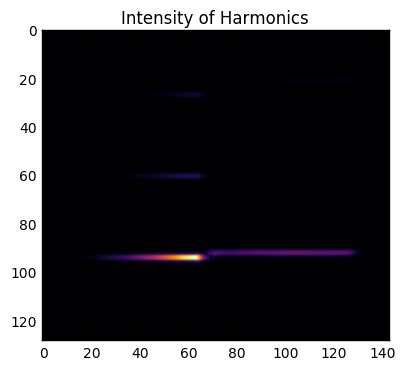

In [2]:
mat = sio.loadmat('flute.mat')
mat = np.asarray(mat['X'])
plt.imshow(mat, cmap='inferno')
plt.title("Intensity of Harmonics")
plt.rcParams["figure.figsize"] = [16,3.5]
plt.show()

It seems there are two musical notes. 

In [3]:
def cov_matrix(matrix):
    """
    Takes any matrix
    and returns its covariance matrix
    """
    sample = matrix.shape[0] -1
    centered_matrix = (np.transpose(matrix) - np.mean(matrix, axis = 1)).transpose()
    covmat = np.dot(centered_matrix, centered_matrix.transpose()) / sample
    return covmat

In [4]:
def power_iteration(matrix, n):
    """
    Takes a matrix and number of iteration
    and returns its greatest eigenvalue and eigenvector
    """
    x = matrix
    y = np.random.rand(x.shape[0],1)
    temp = np.dot(x, y)
    for i in range(n):
        temp = np.dot(x, temp)
        temp_norm = np.linalg.norm(temp)
        temp = temp / temp_norm
    print(temp_norm)
    print(temp)
    return temp_norm, temp

In [5]:
cov_x = np.cov(mat)
eig1, eig_vec1 = power_iteration(cov_x, 100000)
eig_vec1_transpose = np.reshape(eig_vec1, (1, cov_x.shape[0]))
C = eig1 * np.dot(eig_vec1, eig_vec1_transpose)
B = cov_x - C
eig2, eig_vec2 = power_iteration(B, 100000)
eig_vec1 = np.asarray(eig_vec1)
eig_vec2 = np.asarray(eig_vec2)
print(eig_vec1, eig_vec2)

942.6658058
[[  2.58548929e-04]
 [  2.08364483e-04]
 [  2.48692642e-04]
 [  2.07229756e-04]
 [  2.51180865e-04]
 [  2.27816299e-04]
 [  2.12323554e-04]
 [  1.53023454e-04]
 [  1.21632397e-04]
 [  1.41146142e-04]
 [  8.50193180e-05]
 [  1.63862217e-04]
 [  1.94950152e-04]
 [  9.98529936e-05]
 [  1.74490433e-04]
 [  2.60591162e-04]
 [  1.83548470e-04]
 [  1.90301077e-04]
 [  8.87810787e-05]
 [ -1.12332552e-03]
 [ -8.87768316e-03]
 [ -1.06943221e-02]
 [ -2.75655339e-03]
 [  1.29573188e-04]
 [  1.34334849e-03]
 [  1.06428656e-02]
 [  4.78134318e-02]
 [  4.62951703e-02]
 [  9.28729768e-03]
 [  1.32838166e-03]
 [  3.61329119e-04]
 [  2.38352753e-04]
 [  1.14997481e-04]
 [  9.98197244e-05]
 [  1.42066601e-04]
 [  8.38642322e-05]
 [  4.61211353e-05]
 [  1.22458897e-04]
 [  1.48434260e-04]
 [  6.17727880e-05]
 [  2.51656939e-05]
 [  4.49411927e-05]
 [  4.38807359e-05]
 [  4.12924085e-05]
 [  7.44891511e-05]
 [  7.85681115e-05]
 [  5.07805060e-05]
 [  5.27986338e-05]
 [  9.53290613e-05]
 [  2.85

In [6]:
type(eig_vec1)
eig_vec1.shape

(128, 1)

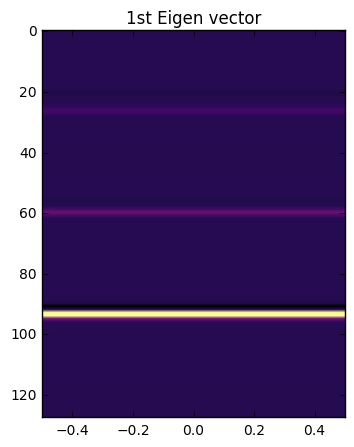

In [17]:
plt.imshow(eig_vec1, cmap='inferno', aspect = 0.01)
plt.title("1st Eigen vector")
plt.rcParams["figure.figsize"] = [8,5]
plt.show()

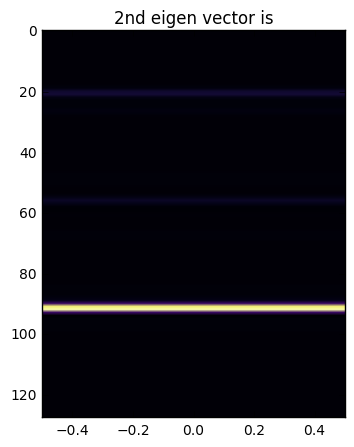

In [8]:
plt.imshow(eig_vec2, cmap='inferno', aspect = 0.01)
plt.title("2nd eigen vector is")
plt.rcParams["figure.figsize"] = [8,5]
plt.show()

In [9]:
eig_vec1.shape
eig_vec2.shape
eig_vec = [eig_vec1, eig_vec2]
eig_vec = np.asarray(eig_vec)
print(eig_vec.shape)
eig_vec = np.reshape(eig_vec, (2, 128))
print(eig_vec1.shape)

(2, 128, 1)
(128, 1)


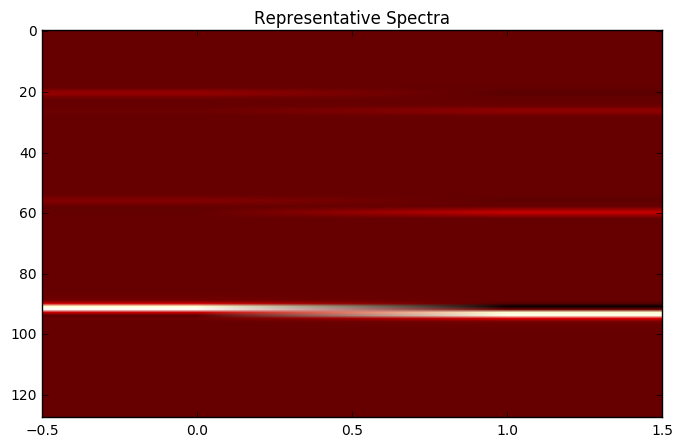

In [10]:
spectra = np.column_stack((eig_vec2,eig_vec1))
plt.imshow(spectra, aspect='auto', cmap=plt.get_cmap("hot"))
plt.title("Representative Spectra")
plt.rcParams["figure.figsize"] = [16,6]
plt.show()

In [11]:
#Temporal Activation
activation = np.dot(spectra.transpose(), mat)

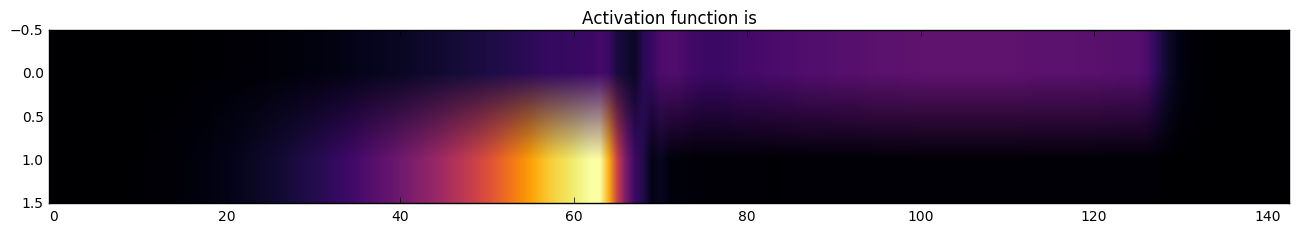

In [12]:
plt.imshow(activation, cmap='inferno', aspect = 10)
plt.title("Activation function is")
plt.rcParams["figure.figsize"] = [10,16]
plt.show()

In [13]:
notes = np.dot(eig_vec, mat)
notes = np.asarray(notes)
note1 = np.dot(mat.transpose(), eig_vec1)
note2 = np.dot(mat.transpose(), eig_vec2)

Displaying the first recovered note

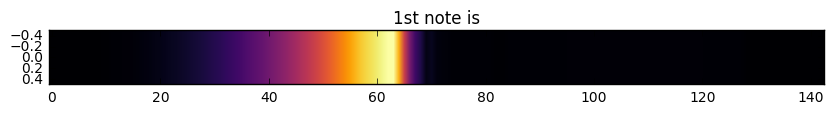

In [14]:
plt.imshow(note1.transpose(), cmap='inferno', aspect = 10)
plt.title("1st note is")
plt.rcParams["figure.figsize"] = [10,16]
plt.show()

Displaying the second recovered note

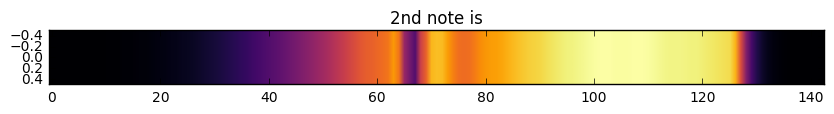

In [15]:
plt.imshow(note2.transpose(), cmap='inferno', aspect = 10)
plt.title("2nd note is")
plt.rcParams["figure.figsize"] = [10,16]
plt.show()